In [1]:
import math
import os
import openpyxl
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if platform.platform()[:3].lower() == 'mac':
    mac_m1 = True
elif platform.platform()[:3].lower() == 'win':
    mac_m1 = False
    
if mac_m1:
    path = '/Users/rainyseason/winston/Workspace/python/Pycharm Project/sinewave_analyze/Evaluation/'
    path_csv = path + 'tek_csv/'
    path_excel = path + 'tek_excel/'
    path_summary = path + 'summary/'
    path_information = path + 'test information/'
    path_kmon = path + 'kmon_csv'
else:
    path = 'D:/data_analyze/'
    path_csv = path + 'tek_csv/'
    path_excel = path + 'tek_excel/'
    path_summary = path + 'summary/'
    path_information = path + 'test information/'
    path_kmon = path + 'kmon_csv/'
    
evaluation_control_file = 'eval_control.xlsx'

In [2]:
files = os.listdir(path_summary)
files = [file for file in files if '00 07' in file and '~' not in file ]
files.sort()
files

['summary 00 07 08Ch3.xlsx', 'summary 00 07 08Ch4.xlsx']

In [3]:
sheet = pd.ExcelFile(path_summary + files[-1]).sheet_names
print(sheet[0])

with kmon correction


In [4]:
df_ch3 = pd.read_excel(path_summary + files[0], sheet[0])
df_ch4 = pd.read_excel(path_summary + files[1], sheet[0])

In [5]:
df_all_dict = {'df_ch3': df_ch3, 'df_ch4': df_ch4}

In [6]:
df_all_dict['df_ch3_300'] = df_ch3.iloc[15:41, :]
df_all_dict['df_ch4_300'] = df_ch3.iloc[15:41, :]

In [7]:
df_all_dict['df_ch3_curr_sweep_ch4_open'] = df_ch3.iloc[54:305, :]
df_all_dict['df_ch4_curr_sweep_ch3_open'] = df_ch4.iloc[305:556, :]
df_all_dict['df_ch3_curr_sweep_ch4_220ma'] = df_ch3.iloc[556:807, :]
df_all_dict['df_ch4_curr_sweep_ch3_220ma'] = df_ch4.iloc[807:, :]

In [8]:
for key, df in df_all_dict.items():
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)

/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/831757339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/831757339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/831757339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [9]:
drop_columns = ['Board', 'PWM', 'V Frequency[MHz]', 'Volt', 'Ave. RP Coff', 'Real P[W]', 'Vmean', 'Imean[mA]', 'FFT V freq[MHz]',
       'FFT V rms', 'FFT V dc abs', 'FFT I freq[MHz]', 'FFT I rms[mA]', 'FFT I dc abs[mA]', 'Usr Status',
       'RF Volt Ch 1', 'RF Volt Ch 2', 'RF Curr Ch 1', 'RF Curr Ch 2', 'CP Pwm Ch 1', 'CP Pwm Ch 2', 'Loop Time 0.1 us']

In [10]:
for key, df in (df_all_dict.items()):
    for col in drop_columns:
        df.drop([col], axis=1, inplace=True)
    for col in list(df.columns):
        if 'deviation' in col:
            df.drop([col], axis=1, inplace=True)

/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
/var/folders/99/s34zzfr57xs9_1q57tnxdmrr0000gn/T/ipykernel_3792/587526621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [11]:
df_all_dict.keys()

dict_keys(['df_ch3', 'df_ch4', 'df_ch3_300', 'df_ch4_300', 'df_ch3_curr_sweep_ch4_open', 'df_ch4_curr_sweep_ch3_open', 'df_ch3_curr_sweep_ch4_220ma', 'df_ch4_curr_sweep_ch3_220ma'])

In [12]:
for idx, key in enumerate(df_all_dict.keys()):
    if idx > 3:
        for i in range(len(df_all_dict[key])):
            df_all_dict[key].at[i, 'Curr'] = i
#             df_all_dict[key].at[i, 'Volt'] = 9999

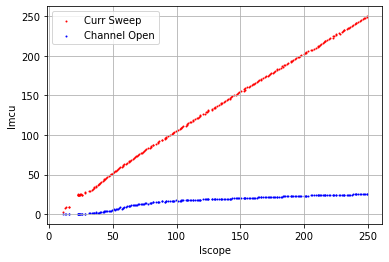

In [13]:
x = df_all_dict['df_ch3_curr_sweep_ch4_open']['Irms[mA]']
y = df_all_dict['df_ch3_curr_sweep_ch4_open']['RF Curr Ch 3']
y2 = df_all_dict['df_ch3_curr_sweep_ch4_open']['RF Curr Ch 4']

plt.scatter(x[:], y[:], s=1, c='r', label='Curr Sweep')
plt.scatter(x[:], y2[:], s=1, c='b', label='Channel Open')
plt.grid()
plt.xlabel('Iscope')
plt.ylabel('Imcu')
plt.legend()
plt.show()

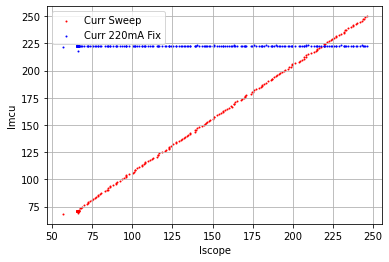

In [14]:
x = df_all_dict['df_ch3_curr_sweep_ch4_220ma']['Irms[mA]']
y = df_all_dict['df_ch3_curr_sweep_ch4_220ma']['RF Curr Ch 3']
y2 = df_all_dict['df_ch3_curr_sweep_ch4_220ma']['RF Curr Ch 4']

plt.scatter(x[:], y[:], s=1, c='r', label='Curr Sweep')
plt.scatter(x[:], y2[:], s=1, c='b', label='Curr 220mA Fix')
plt.grid()
plt.xlabel('Iscope')
plt.ylabel('Imcu')
plt.legend()
plt.show()

In [18]:
df_all_dict[list(df_all_dict.keys())[5]].columns

Index(['filename', 'ohm', 'Ch', 'Curr', 'Delay(degree)', 'Vpeak[V]',
       'Irms[mA]', 'RF Volt Ch 3', 'RF Volt Ch 4', 'RF Curr Ch 3',
       'RF Curr Ch 4', 'CP Pwm Ch 3', 'CP Pwm Ch 4'],
      dtype='object')

In [ ]:
df_phantom = df.iloc[:13, :]
df_R_non_inter = df.iloc[13:26, :]
df_R = df.iloc[26:, :]

df_R.reset_index(inplace=True)
df_R = df_R.drop(['index'], axis=1)
df_R_non_inter.reset_index(inplace=True)
df_R_non_inter = df_R_non_inter.drop(['index'], axis=1)

In [ ]:
df_phantom = df.iloc[:13, :]
df_R_non_inter = df.iloc[13:26, :]
df_R = df.iloc[26:, :]

In [ ]:
df_R.reset_index(inplace=True)
df_R = df_R.drop(['index'], axis=1)
df_R_non_inter.reset_index(inplace=True)
df_R_non_inter = df_R_non_inter.drop(['index'], axis=1)

In [ ]:
for i in range(len(df_R_non_inter)):
    resistor = df_R_non_inter.at[i, 'Vp_ch3'] / math.sqrt(2) / (df_R_non_inter.at[i, 'Irms_ch3'] * 10**-3)
    if np.isnan(resistor):
        print("{} = {} / {}".format(resistor, df_R_non_inter.at[i, 'Vp_ch3'] / math.sqrt(2), df_R_non_inter.at[i, 'Irms_ch3'] * 10**-3))
    else:
        print("{:.2f} = {:.2f} / {:.2f}   Ch3 {:6.1f}mA Ch4 {:6.1f}mA".format(resistor, df_R_non_inter.at[i, 'Vp_ch3'] / math.sqrt(2), df_R_non_inter.at[i, 'Irms_ch3'] * 10**-3, df_R_non_inter.at[i, 'Irms_ch3'], df_R_non_inter.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_R)):
    resistor = df_R.at[i, 'Vp_ch3'] / math.sqrt(2) / (df_R.at[i, 'Irms_ch3'] * 10**-3)
    if np.isnan(resistor):
        print("{} = {} / {}".format(resistor, df_R.at[i, 'Vp_ch3'] / math.sqrt(2), df_R.at[i, 'Irms_ch3'] * 10**-3))
    else:
        print("{:8.2f} = {:05.2f} / {:04.2f}   Ch3 {:6.1f}mA Ch4 {:6.1f}mA".format(resistor, df_R.at[i, 'Vp_ch3'] / math.sqrt(2), df_R.at[i, 'Irms_ch3'] * 10**-3, df_R.at[i, 'Irms_ch3'], df_R.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_phantom)):
    resistor = df_phantom.at[i, 'Vp_ch3'] / math.sqrt(2) / (df_phantom.at[i, 'Irms_ch3'] * 10**-3)
    if np.isnan(resistor):
        print("{} = {} / {}".format(resistor, df_phantom.at[i, 'Vp_ch3'] / math.sqrt(2), df_phantom.at[i, 'Irms_ch3'] * 10**-3))
    else:
        print("{:6.2f} = {:5.2f} / {:4.2f}   Ch3 {:6.1f}mA Ch4 {:6.1f}mA".format(resistor, df_phantom.at[i, 'Vp_ch3'] / math.sqrt(2), df_phantom.at[i, 'Irms_ch3'] * 10**-3, df_phantom.at[i, 'Irms_ch3'], df_phantom.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_R)):
    print("{:4.0f} {:4.0f} || {:3.0f} {:4.0f}".format(df_R.at[i, 'Irms_ch3'], df_R.at[i, 'Irms_ch4'], df_phantom.at[i, 'Irms_ch3'], df_phantom.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_phantom)):
    print("{:4.0f} {:4.0f} || {:3.0f} {:4.0f}".format(df_R.at[i, 'Irms_ch3'], df_R.at[i, 'Irms_ch4'], df_R.at[i, 'PWM_ch3'], df_R.at[i, 'PWM_ch4'], df_phantom.at[i, 'Irms_ch3'], df_phantom.at[i, 'Irms_ch4']))

위 두 결과를 보면 동일 전류밸런스가 깨지면 전류가 높은 쪽은 낮은 PWM으로 고전류, 전류가 낮은 쪽은 보다 높은 PWM으로 동작함
이는 저전류쪽에서 고전류쪽으로 인입이되는 듯
추가 확인 사항은 전류프루브를 V+에서도 동시확인 필요
R model은 Imuc 상에서는 전류프루브와 다르고 phantom model은 전류프루브와 비슷한듯
